# 30s eye-opening game

there is a game on tiktok where two people close their eyes for 30 seconds, and they have to open their eyes 5 times for 1 second each. 
if they both open their eyes at the same time, they lose. or something like that, i don't know

https://www.tiktok.com/@user19880817to/video/7445268746152824072

anyways, we wanted to see what the odds would be for different number of times and different time windows.

In [35]:
import math
import matplotlib.pyplot as plt

n_times = 5
period = 30

def prob(n, p):
    possible_winning = math.comb(p, n * 2) * math.comb(2*n, n)
    total_possible = math.comb(p, n) ** 2
    return possible_winning / total_possible * 100

x_period = list(range(10, 3000))
x_numtimes = list(range(1, 10))

y_period = list(map(lambda x: prob(n_times, x), x_period))
y_numtimes = list(map(lambda x: prob(x, period), x_numtimes))

first thought was that we can model the problem as having 30 buckets, and each player chooses 5 buckets. a winning outcome would be if there are 10 unique buckets chosen (so 30 choose 10), but we forgot that there are 2x that many because that doesn't account for whose buckets were which.

anyways, the possible winning outcomes should be (30 choose 10) times (10 choose 5), and the total possible outcomes should be (30 choose 5) squared, since both players choose them independently.

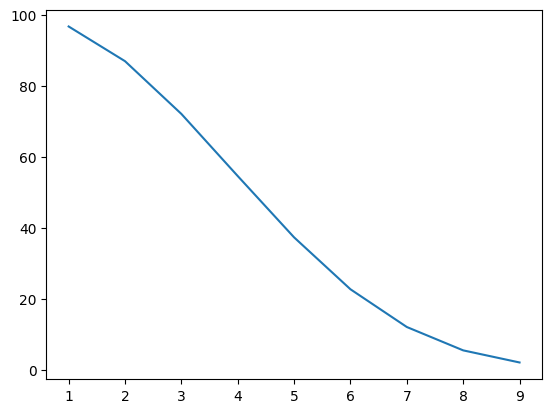

In [36]:
plt.plot(x_numtimes, y_numtimes)

it was sort of surprising that if you set the game to 5 times, you already only have about 30% chance of winning. it's sort of like the birthday game or the pigeonhole principle, but not that intuitive at first glance.

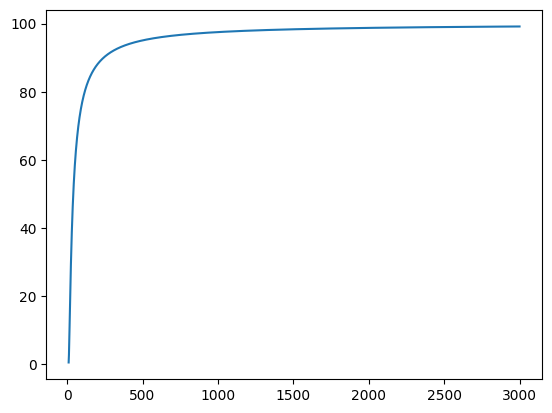

In [38]:
plt.plot(x_period, y_period)

we were hung up on this one for a while because our graph wasn't converging to 100%. first, we fucked up by not multiplying the 30 choose 10 factor, and then we fucked up by multiplying by 2 instead of 10 choose 5.